## Goal: Build a Linear Regression Model with Sines + Cosines

- Load the Joe Biden, Donald Trump Polls
- Build the Dataframe, as done previously
- Add sines and cosines of certain periods
- Build a regression model for each candidate!

In [1]:
from realclearpolling import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#Load in the joe biden, donald trump data

df = clean_data(get_poll_data())
df.head()


,pollster,date,sample,moe,Trump (R),Biden (D),spread,Difference,Type of Voter,Sample Size,End Date,Poll Month,Year,Days Since 01-01-23
0,NY Times/Siena,2/25 - 2/28,980 LV,3.5,48.0,44.0,Trump+4,4.0,LV,980,2024-02-28,2,2024,423
1,Forbes/HarrisX,2/24 - 2/28,3021 RV,1.8,52.0,48.0,Trump+4,4.0,RV,3021,2024-02-28,2,2024,423
2,Economist/YouGov,2/25 - 2/27,1498 RV,3.2,44.0,44.0,Tie,0.0,RV,1498,2024-02-27,2,2024,422
3,Morning Consult,2/23 - 2/25,6224 RV,1.0,44.0,43.0,Trump+1,1.0,RV,6224,2024-02-25,2,2024,420
4,Harvard-Harris,2/21 - 2/22,2022 RV,—,53.0,47.0,Trump+6,6.0,RV,2022,2024-02-22,2,2024,417


In [90]:
# Add sines and cosines of the day of the year to the data
df['sinfreq1'] = np.sin(np.pi*df["Days Since 01-01-23"]/30)
df['cosfreq1'] = np.cos(np.pi*df["Days Since 01-01-23"]/30)
df['sinfreq2'] = np.sin(245*np.pi*df["Days Since 01-01-23"]/30)
df['cosfreq2'] = np.cos(245*np.pi*df["Days Since 01-01-23"]/30)
df['sinfreq3'] = np.sin(180*np.pi*df["Days Since 01-01-23"]/30)
df['cosfreq3'] = np.cos(180*np.pi*df["Days Since 01-01-23"]/30)
df['sinfreq4'] = np.sin(359*np.pi*df["Days Since 01-01-23"]/30)
df['cosfreq4'] = np.cos(359*np.pi*df["Days Since 01-01-23"]/30)

In [91]:
# We'll use the pollster, sine and cosine of the day of the year as features
#X = df[['sinfreq1','cosfreq1', 'sinfreq2', 'cosfreq2', 'sinfreq3', 'cosfreq3','sinfreq4', 'cosfreq4']]
X = df[['sinfreq1','cosfreq1', 'sinfreq2', 'cosfreq2', 'sinfreq3', 'cosfreq3']]
Xtrain = X[df["End Date"] < "2024-01-01"]
Xtest = X[df["End Date"] > "2024-01-01"]
X = pd.get_dummies(X, drop_first=True)
jby = df["Biden (D)"]
dty = df["Trump (R)"]

jbytrain = jby[df["End Date"] < "2024-01-01"]
jbytest = jby[df["End Date"] > "2024-01-01"]
dtytrain = dty[df["End Date"] < "2024-01-01"]
dtytest = dty[df["End Date"] > "2024-01-01"]
# Fit the model
jbmodel = LinearRegression()
jbmodel.fit(X, jby)
jbpredictions = jbmodel.predict(X) 


dtmodel = LinearRegression()
dtmodel.fit(X, dty)
dtpredictions = dtmodel.predict(X)



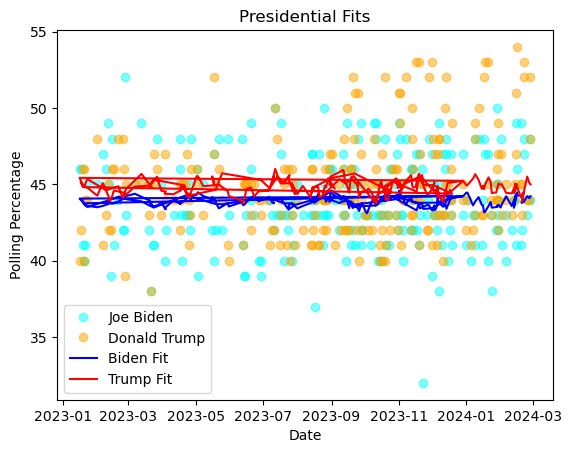

In [92]:
# Plot a time series of the polls and then the fit from the model
dates = df["End Date"]
plt.plot(dates, jby, 'o', label='Joe Biden', alpha = 0.5, color = 'aqua')
plt.plot(dates, dty, 'o', label='Donald Trump', alpha = 0.5, color = 'orange')
plt.plot(dates, jbpredictions, label='Biden Fit', color = 'blue')
plt.plot(dates, dtpredictions, label='Trump Fit', color = 'red')
plt.xlabel('Date')
plt.ylabel('Polling Percentage')
plt.title('Presidential Fits')
plt.legend()
plt.show()

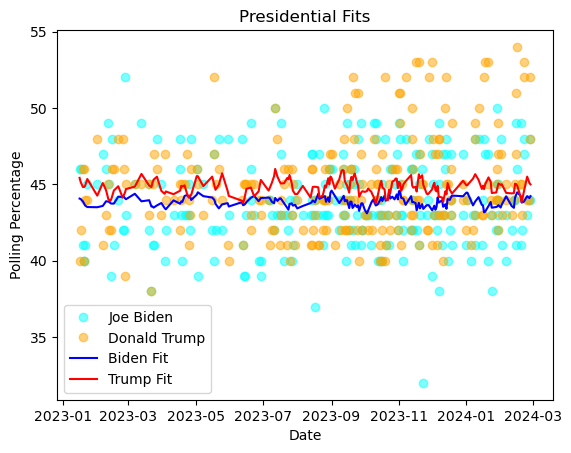

In [93]:
#Is it possible to subset the predictions to only include the unique dates?
unique_dates = np.unique(dates)
unique_jbpredictions = []
unique_dtpredictions = []
for date in unique_dates:
    unique_jbpredictions.append(jbpredictions[dates == date].mean())
    unique_dtpredictions.append(dtpredictions[dates == date].mean())
plt.plot(dates, jby, 'o', label='Joe Biden', alpha = 0.5, color = 'aqua')
plt.plot(dates, dty, 'o', label='Donald Trump', alpha = 0.5, color = 'orange')
plt.plot(unique_dates, unique_jbpredictions, label='Biden Fit', color = 'blue')
plt.plot(unique_dates, unique_dtpredictions, label='Trump Fit', color = 'red')
plt.xlabel('Date')
plt.ylabel('Polling Percentage')
plt.title('Presidential Fits')
plt.legend()
plt.show()